In [ ]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/1632560262896716.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#**preprocessing data**

In [ ]:
df['Gender'].replace('Female',0 ,inplace=True)
df['Gender'].replace('Male',1 ,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

#**transform data**

In [ ]:
X = df.values[:,1:]
X_df = StandardScaler().fit_transform(X)
X_df[0:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

#**KMEANS**

Text(0, 0.5, 'Inertia')

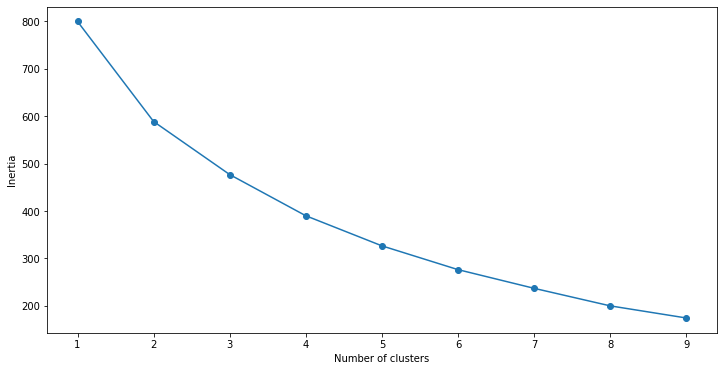

In [ ]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++' ,n_init = 12 )
    kmeans.fit(X_df)
    SSE.append(kmeans.inertia_)

# find best k for kmeans

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
df_kmeans = KMeans(n_clusters= 4 , init = 'k-means++' , n_init= 20)
df_kmeans.fit(X_df)
labels = df_kmeans.labels_
unique_labels = set(labels)
unique_labels

{0, 1, 2, 3}

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X_df, kmeans.labels_, metric='euclidean'))

0.4022780584999401


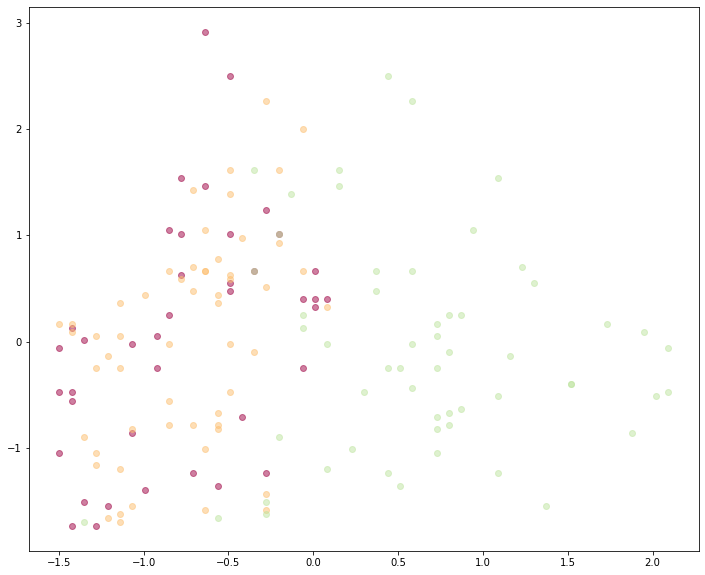

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(range(3), colors):
    my_members = (df_kmeans.labels_ == k)
    plt.scatter(X_df[my_members, 1], X_df[my_members, 2],  c=col, marker=u'o', alpha=0.5)
plt.show()

In [ ]:
df["Cluster_kmeans"] = labels
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_kmeans
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,2


In [ ]:
df.groupby('Cluster_kmeans').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster_kmeans,,,,,
0,103.375000,1.0,28.250000,62.000000,71.675000
1,101.910714,0.0,28.392857,60.428571,68.178571
2,93.214286,0.0,47.803571,58.071429,34.875000
3,104.958333,1.0,49.437500,62.416667,29.208333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


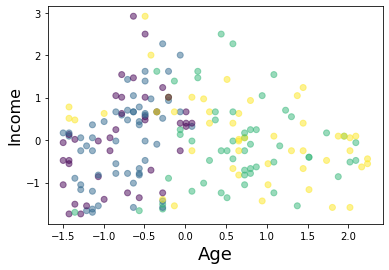

In [ ]:
area = np.pi * ( X[:, 2]) 
plt.scatter(X_df[:, 1], X_df[:, 2], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


#**DBSCAN**

In [ ]:
from itertools import product

eps_values = np.arange(0.5,6,0.25) # eps values to be investigated
min_samples = np.arange(1,7) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    print(DBS_clustering.labels_ , p)
    #sil_score.append(silhouette_score(X_df, DBS_clustering.labels_ , metric='euclidean'))


[ 0  1  2  3  4  3  5  6  7  3  7  8  9  3 10  1  4  1 11  8 12  1 13  1
  9  1  4 14  4  3 15  3 16 17  9  3 18 19  4  3 20 17 21 22 23  3 24 22
 22 22 24 25 22 21 24 21 24 21 22 21 21 26 27 24 21 26 24 27 26 22 21 24
 24 24 21 28 24 29 22 24 21 29 21 24 22 21 24 22 30 24 27 28 21 22 22 28
 24 22 21 28 22 24 21 28 21 22 27 21 21 21 21 22 22 28 22 22 27 24 24 24
 28 22 31 32 22 33 34 32 35 36 37 36 22 33 38 33 39 36 38 33 40 32 22 33
 38 32 34 33 41 32 42 32 39 33 39 33 42 33 42 33 43 33 38 33 44 33 42 33
 41 45 42 45 42 32 46 33 47 45 47 32 41 33 48 33 41 49 50 51 52 33 41 53
 54 33 55 56 57 58 59 60] (0.5, 1)
[-1  0 -1  1  2  1 -1 -1  3  1  3  4  5  1 -1  0  2  0 -1  4 -1  0 -1  0
  5  0  2 -1  2  1 -1  1 -1  6  5  1 -1 -1  2  1 -1  6  7  8 -1  1  9  8
  8  8  9 -1  8  7  9  7  9  7  8  7  7 10 11  9  7 10  9 11 10  8  7  9
  9  9  7 12  9 13  8  9  7 13  7  9  8  7  9  8 -1  9 11 12  7  8  8 12
  9  8  7 12  8  9  7 12  7  8 11  7  7  7  7  8  8 12  8  8 11  9  9  9
 12  8 -1 14  8 

In [ ]:
epsilon = 0.75
minimumSamples = 3
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_df)
labels1 = db.labels_
labels1

array([-1,  0, -1,  1,  1,  1, -1,  1,  2,  1,  2, -1,  1,  1, -1,  0,  1,
        0,  0, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  2,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  3,  1,  1,  0,  3,  0,  3,  0,  3,  1,  1,  4,  1,
        5,  3,  4,  1,  5,  3,  1,  1,  4,  3,  0,  1,  5,  3,  0,  3,  5,
        1,  5,  1,  0,  1,  0,  1,  1,  1,  4,  1,  0,  1,  0,  1,  5,  3,
        0,  3,  0,  3,  5,  1,  0,  3,  0,  3,  5,  1,  0,  1,  5,  3,  5,
        3,  5,  1,  5,  1, -1,  1, -1,  1, -1, -1, -1, -1])

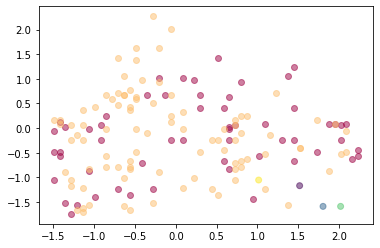

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(range(3), colors):
    my_members = (db.labels_ == k)
    plt.scatter(X_df[my_members, 1], X_df[my_members, 2],  c=col, marker=u'o', alpha=0.5)
plt.show()

In [ ]:
df['claster_dbscan'] = db.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_kmeans,claster_dbscan
0,1,1,19,15,39,0,-1
1,2,1,21,15,81,0,0
2,3,0,20,16,6,2,-1
3,4,0,23,16,77,1,1
4,5,0,31,17,40,2,1


In [ ]:
df.groupby('claster_dbscan').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_kmeans,claster_agg
claster_dbscan,,,,,,,
-1,97.000000,0.538462,33.461538,68.769231,40.230769,1.692308,1.153846
0,91.052632,1.000000,42.473684,56.017544,45.807018,1.894737,1.771930
1,90.223404,0.000000,37.542553,55.893617,56.095745,1.425532,0.680851
2,21.000000,1.000000,61.000000,25.250000,6.250000,3.000000,1.000000
3,155.625000,1.000000,33.562500,81.562500,83.187500,0.000000,3.000000
4,145.500000,1.000000,20.750000,76.250000,8.000000,3.000000,1.000000
5,167.666667,0.000000,43.416667,88.333333,20.416667,2.000000,0.000000


#**hierarchical clustering**

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(X_df,X_df) 
print(dist_matrix)

[[0.         1.63681098 2.38878538 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         3.54154808 ... 4.3182849  5.31878915 4.70189264]
 [2.38878538 3.54154808 0.         ... 5.42195122 5.13299938 5.90251765]
 ...
 [4.54611614 4.3182849  5.42195122 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.13299938 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.90251765 ... 0.5647686  2.5274803  0.        ]]


In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(dist_matrix, 'ward')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


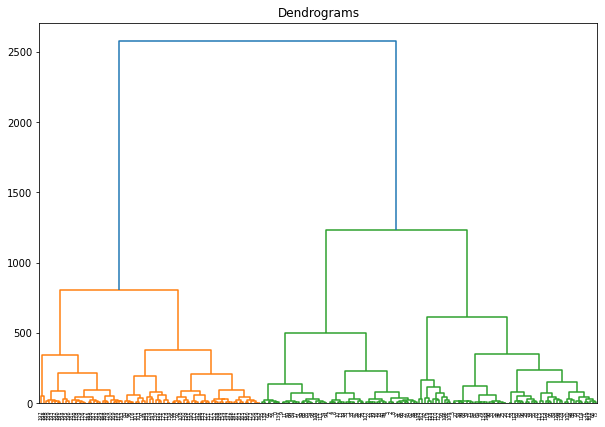

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Z, method='ward'))

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 25
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([12, 12,  8, 14,  8, 14,  8, 14,  3, 14,  3, 14,  8, 14,  3, 12,  8,
       12,  3, 14,  3, 12,  8, 12,  8, 12,  8, 13,  8, 14,  3, 14,  3, 12,
        8, 14,  8, 14,  8, 14,  7, 12,  1, 10,  8, 14,  9, 10, 10, 10,  9,
       13, 10,  1,  9,  1,  9,  2, 10,  1,  2, 13,  7,  9,  1, 13,  9,  7,
       13, 10,  2,  9,  7,  7,  1, 13,  9, 13, 10,  9,  1, 13,  2,  9, 10,
        1,  9, 10, 10,  9,  7, 13,  1,  9, 10, 13,  9, 10,  1, 13, 10,  9,
        2, 13,  1, 10,  7,  1,  2,  2,  2, 10,  9, 13, 10, 10,  7,  9,  9,
        9, 13,  9,  9, 11, 10, 16,  1, 11,  5, 11,  5, 11, 10, 16,  5, 16,
        6, 11,  5, 16,  6, 11, 10, 16,  5, 11,  1, 16,  6, 11,  5, 11,  6,
       16,  6, 16,  5, 16,  5, 16,  6, 16,  5, 16,  5, 16,  5, 16,  6, 11,
        5, 11,  5, 11,  6, 16,  5, 11,  5, 11,  6, 15,  5, 15,  6, 11,  6,
       11,  6, 15,  6, 15,  4, 15,  4, 15,  4,  4,  4,  4], dtype=int32)

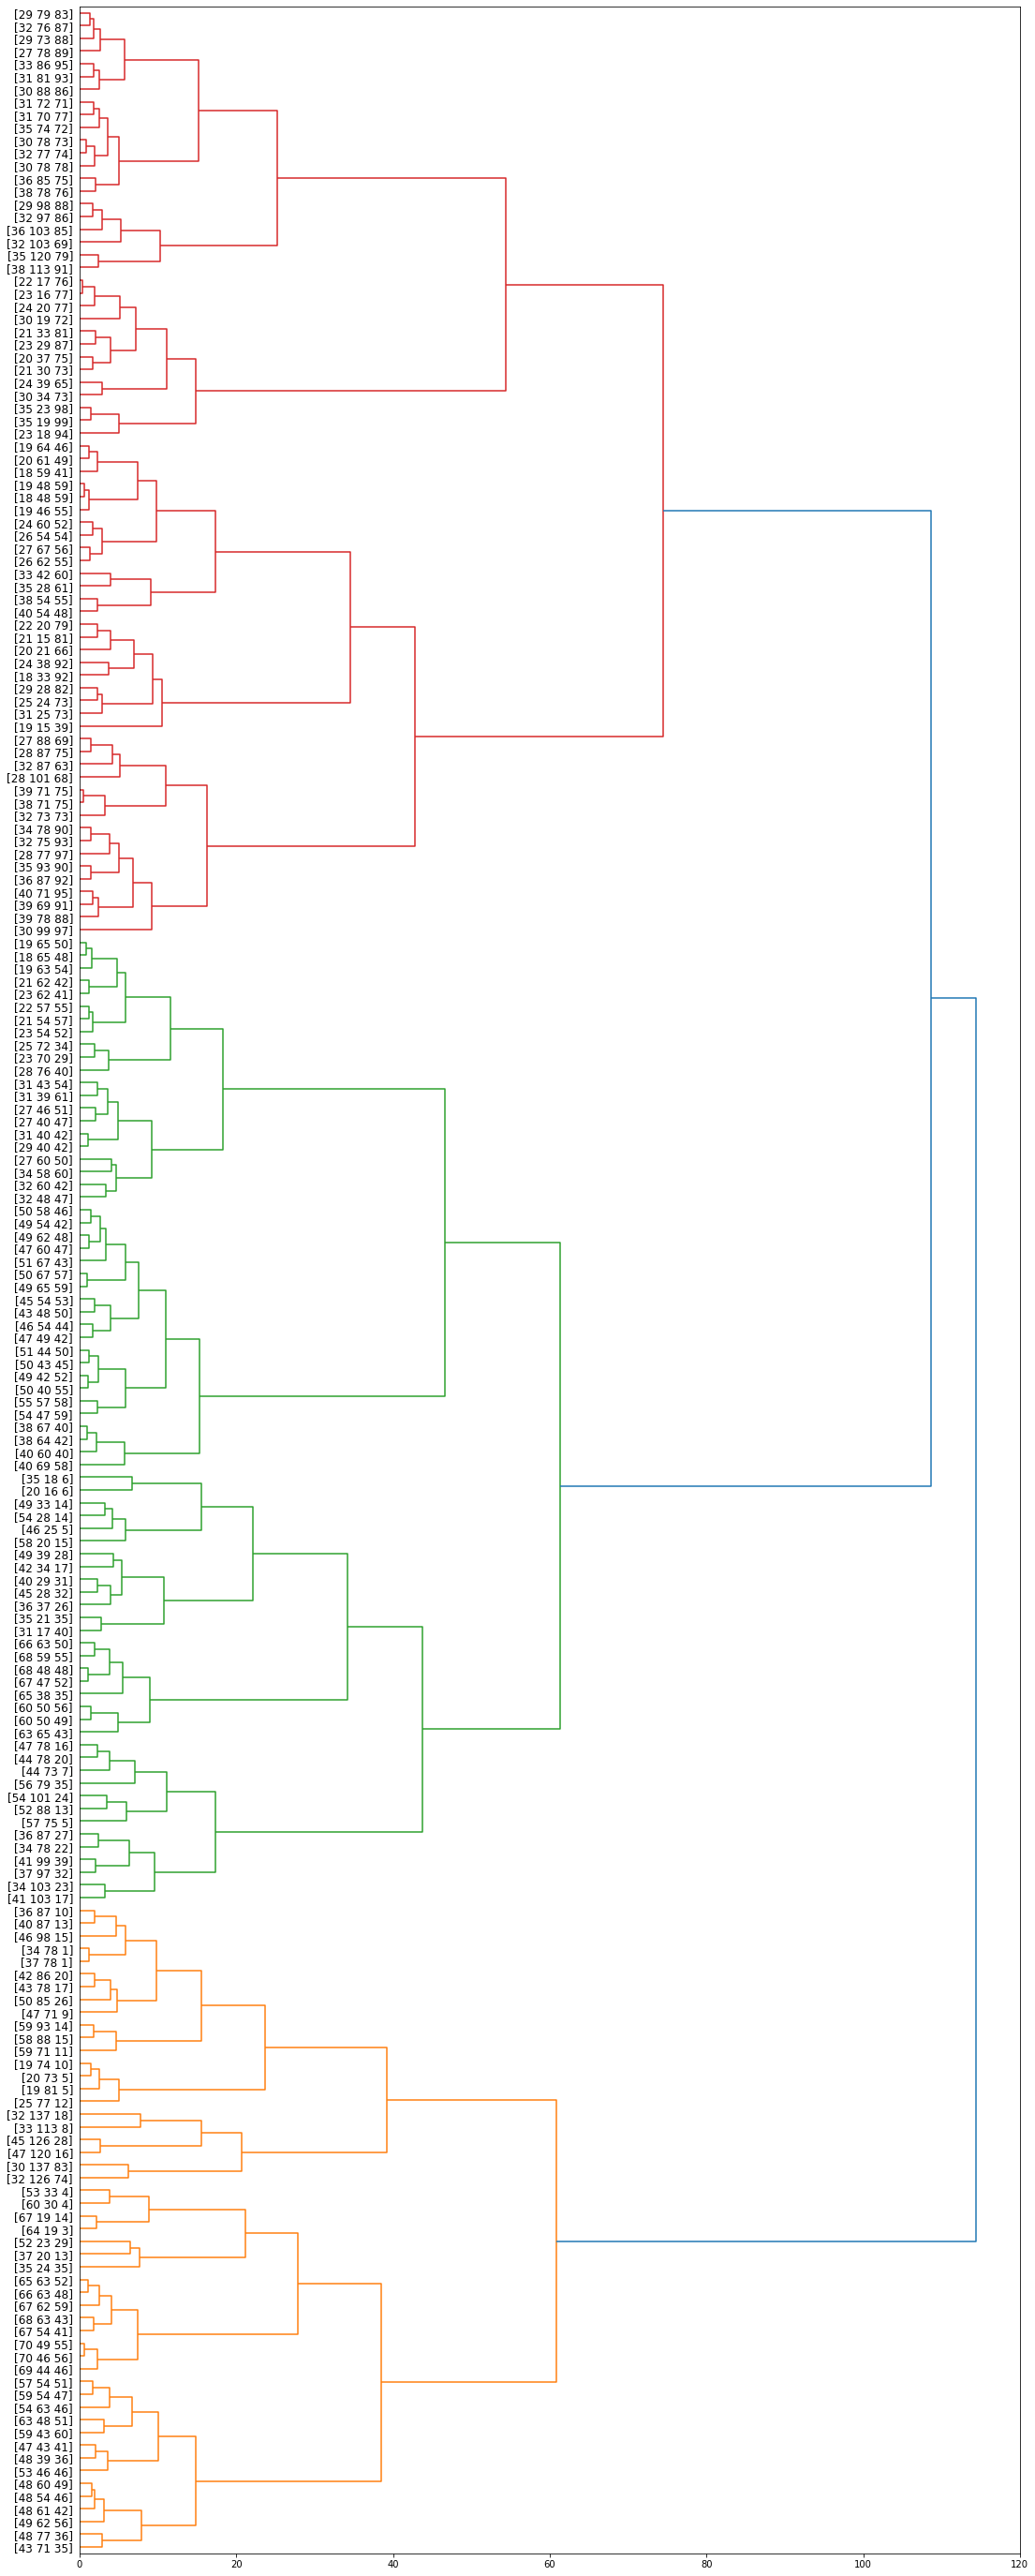

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual Income (k$)'][id], int(float(df['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
agglom.fit(dist_matrix)

agglom.labels_

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([3, 3, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 3, 0, 3, 1, 2, 1, 3,
       0, 3, 0, 3, 0, 3, 0, 2, 1, 2, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 1, 3, 0, 0, 1, 3,
       0, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 3, 0, 0, 1, 3, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 3, 1, 0, 0, 3, 0, 0, 1, 3, 0, 0, 1, 3, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 2, 1, 3, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 2, 0, 3, 0, 2, 1, 3, 1, 2, 0, 3, 1, 3, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 3, 1, 3, 1, 3, 0, 2,
       1, 3, 1, 3, 0, 2, 1, 2, 0, 3, 0, 3, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1,
       1, 1])

In [ ]:
df['claster_agg'] = agglom.labels_
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_kmeans,claster_dbscan,claster_agg
0,1,1,19,15,39,0,-1,3
1,2,1,21,15,81,0,0,3
2,3,0,20,16,6,2,-1,0
3,4,0,23,16,77,1,1,2
4,5,0,31,17,40,2,1,0


In [ ]:
df.groupby('claster_agg').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_kmeans,claster_dbscan
claster_agg,,,,,,,
0,89.592105,0.000000,41.684211,55.907895,39.013158,1.710526,1.578947
1,112.745098,0.960784,48.764706,67.666667,30.490196,2.843137,0.313725
2,109.588235,0.000000,29.617647,62.970588,81.235294,1.000000,0.882353
3,97.820513,1.000000,28.410256,58.230769,70.717949,0.076923,1.205128


In [ ]:
n_clusters = max(agglom.labels_)+1
cluster_labels = list(range(0, n_clusters))
subset = df[df.claster_agg == cluster_labels[0]].count()
subset

CustomerID                76
Gender                    76
Age                       76
Annual Income (k$)        76
Spending Score (1-100)    76
Cluster_kmeans            76
claster_dbscan            76
claster_agg               76
dtype: int64

Text(0, 0.5, 'inmcoem')

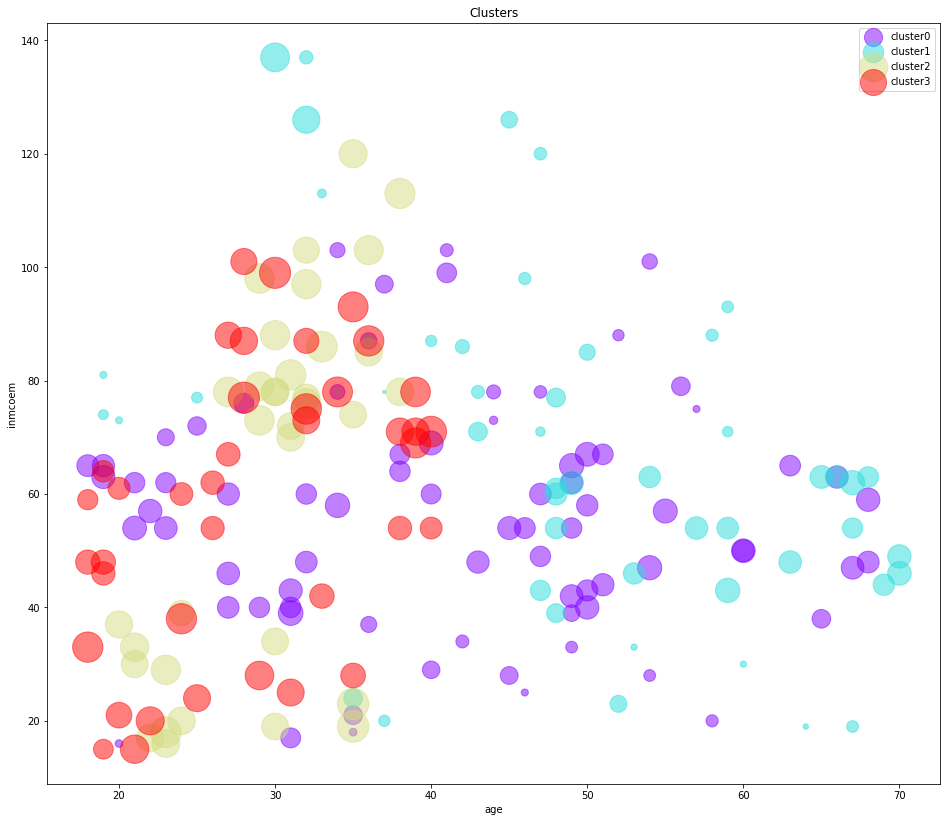

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.claster_agg == label]
    plt.scatter(subset.Age, subset['Annual Income (k$)'], s= subset['Spending Score (1-100)']*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('age')
plt.ylabel('inmcoem')